In [1]:
#Loan prediction Project using Logistic Regression

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [150]:
dataset = pd.read_csv(r'C:\Users\anami\Downloads\train_u6lujuX_CVtuZ9i (1).csv')

In [151]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [152]:
dataset.shape

(614, 13)

In [153]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [155]:
dataset['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [156]:
dataset.isnull().head(-10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,False,False,False,False,False,False,False,False,False,False,False,False,False
600,False,False,False,False,False,True,False,False,False,False,True,False,False
601,False,False,False,False,False,True,False,False,False,False,False,False,False
602,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Gender', ylabel='count'>

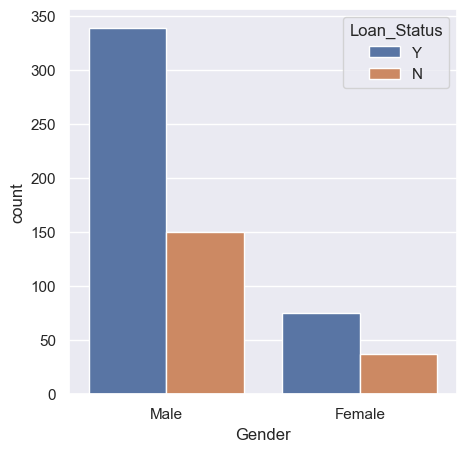

In [157]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
sns.countplot(x='Gender', hue='Loan_Status', data=dataset)

<Axes: xlabel='Married', ylabel='count'>

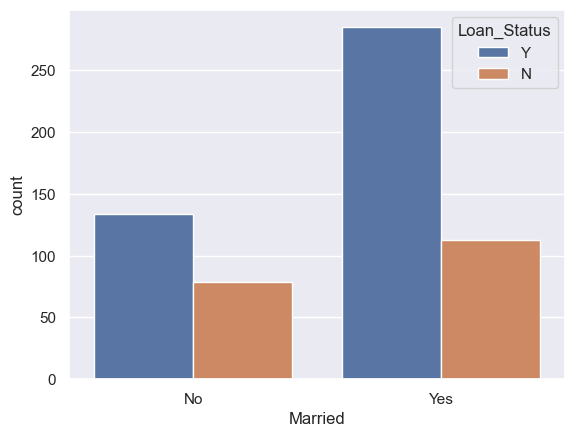

In [158]:
sns.countplot(x='Married', hue='Loan_Status', data=dataset)

<Axes: xlabel='Dependents', ylabel='count'>

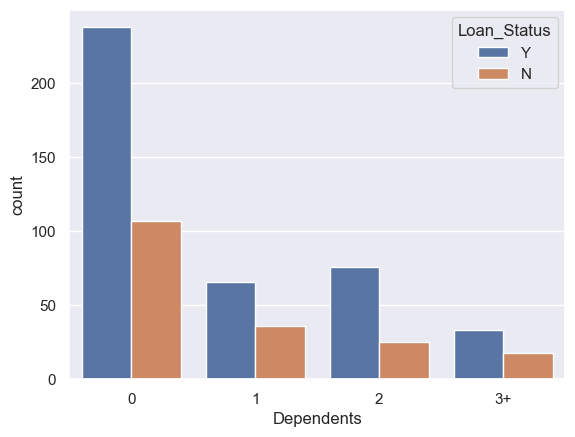

In [159]:
sns.countplot(x='Dependents', hue='Loan_Status', data=dataset)

<Axes: xlabel='Education', ylabel='count'>

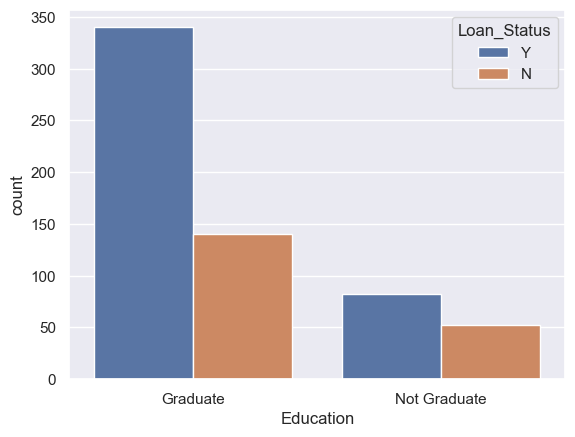

In [160]:
sns.countplot(x='Education', hue='Loan_Status', data=dataset)

<Axes: xlabel='Credit_History', ylabel='count'>

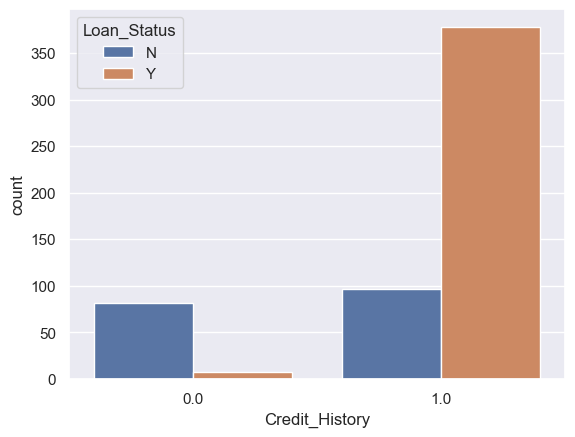

In [161]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

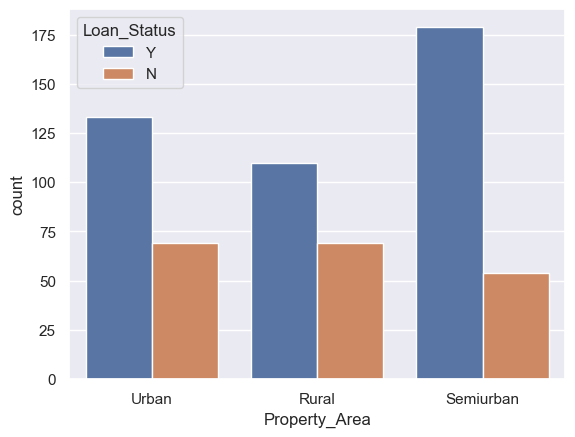

In [162]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=dataset)

In [163]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [164]:
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0])

In [165]:
dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.Loan_Amount_Term=dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean())

In [166]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

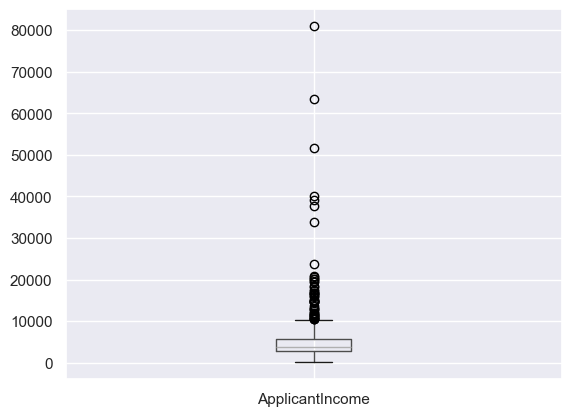

In [167]:
dataset.boxplot(column="ApplicantIncome")

<Axes: >

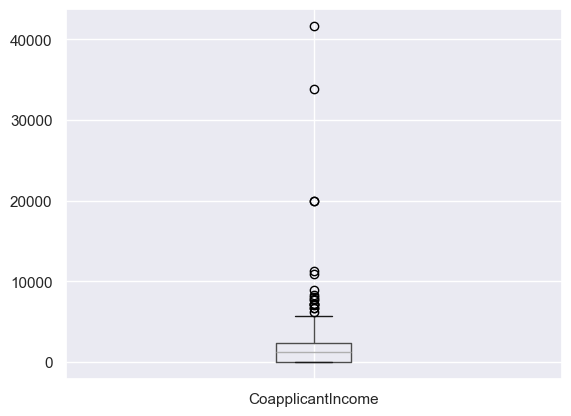

In [168]:
dataset.boxplot(column="CoapplicantIncome")

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

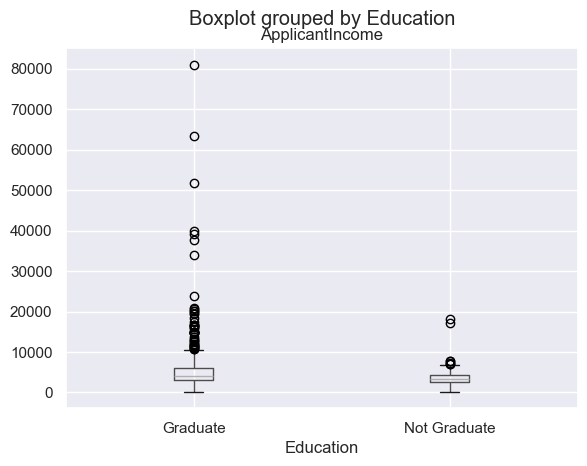

In [169]:
dataset.boxplot(column="ApplicantIncome",by='Education')

<Axes: >

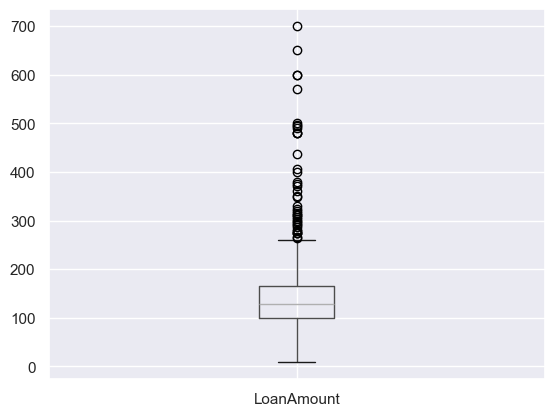

In [170]:
dataset.boxplot(column="LoanAmount")

<Axes: >

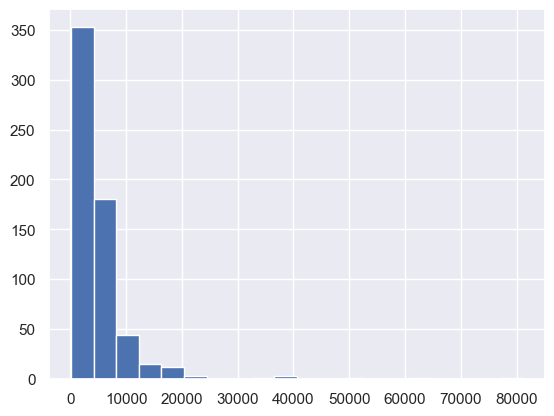

In [171]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

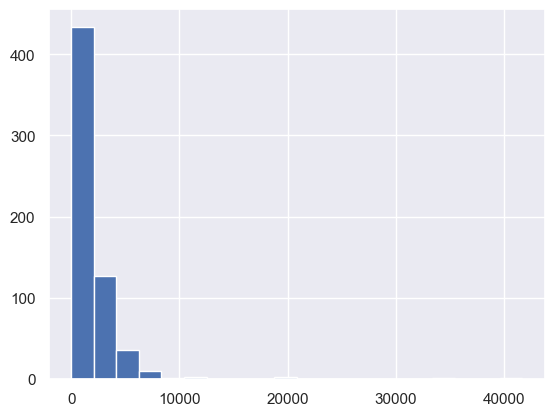

In [172]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: >

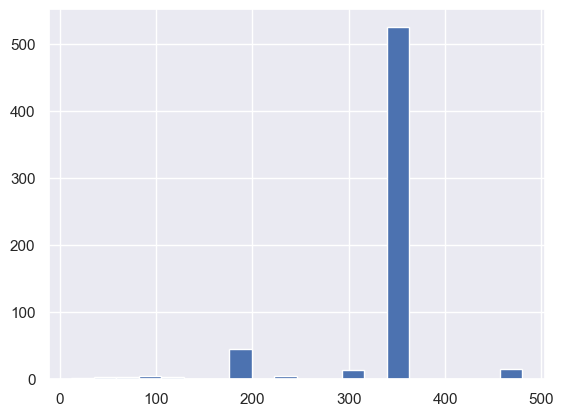

In [173]:
dataset['Loan_Amount_Term'].hist(bins=20)

<Axes: >

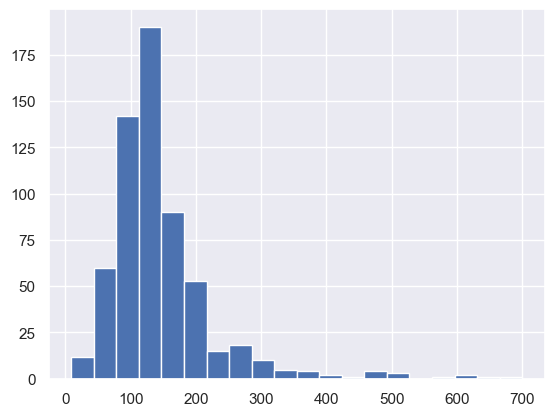

In [174]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

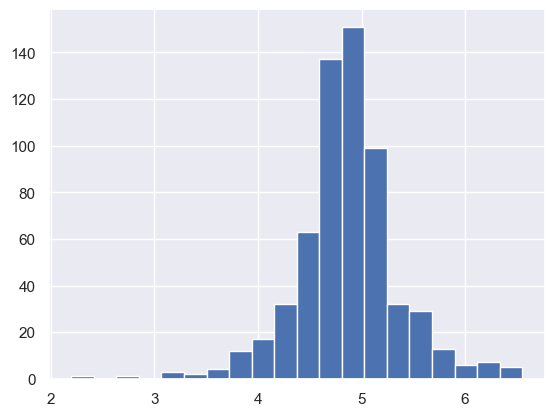

In [175]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

<Axes: >

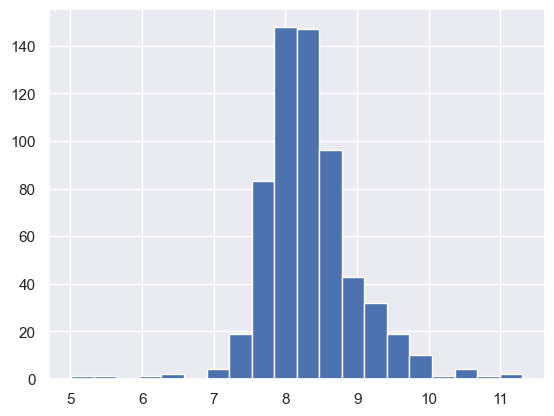

In [176]:
dataset['ApplicantIncome_log']=np.log(dataset['ApplicantIncome'])
dataset['ApplicantIncome_log'].hist(bins=20)

In [177]:
dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']

In [178]:
dataset['TotalIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64

<Axes: >

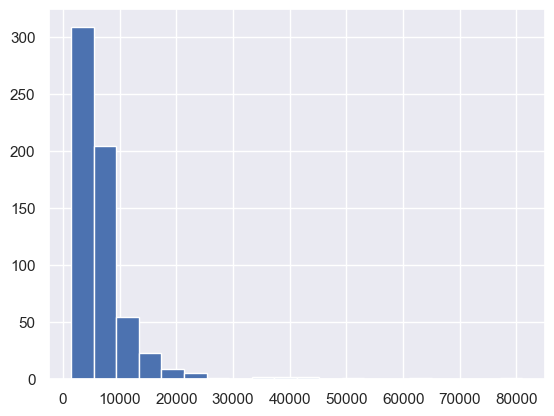

In [179]:
dataset['TotalIncome'].hist(bins=20)

In [180]:
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

<Axes: >

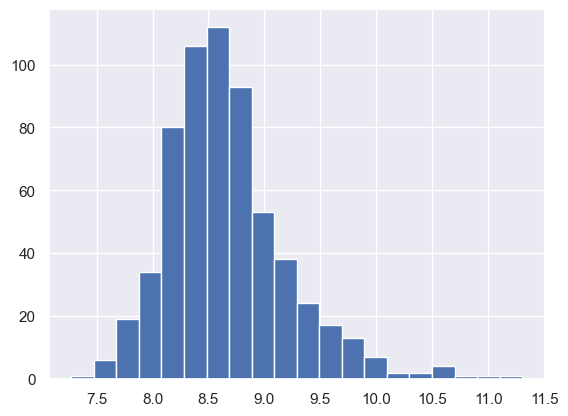

In [181]:
dataset['TotalIncome_log'].hist(bins=20)

In [182]:
x=dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=dataset['Loan_Status']

In [183]:
print(x)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [184]:
print(y)

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [186]:
print(x.shape,x_train.shape,x_test.shape)

(614, 15) (491, 15) (123, 15)


In [187]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [188]:
for i in range(5):
    x_train.iloc[:, i] = labelencoder_x.fit_transform(x_train.iloc[:, i])

In [189]:
x_train.iloc[:, 7] = labelencoder_x.fit_transform(x_train.iloc[:, 7])

In [191]:
labelencoder_y = LabelEncoder()
y_train= labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [192]:
for i in range(5):
    x_test.iloc[:, i] = labelencoder_x.fit_transform(x_test.iloc[:, i])

In [193]:
x_test.iloc[:, 7] = labelencoder_x.fit_transform(x_test.iloc[:, 7])

In [199]:
y_test= labelencoder_y.fit_transform(y_test)

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train) 
x_test = ss.transform(x_test)         

In [202]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [203]:
y_pred=DTClassifier.predict(x_test)

In [204]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [205]:
from sklearn import metrics
print("The accuracy of the Decision Tree Classifier :",metrics.accuracy_score(y_pred,y_test))

The accuracy of the Decision Tree Classifier : 0.6829268292682927


In [206]:
NBClassifier=GaussianNB()

In [207]:
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [208]:
y_pred=NBClassifier.predict(x_test)

In [209]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [210]:
print("The accuracy of the Decision Tree Classifier :",metrics.accuracy_score(y_pred,y_test))

The accuracy of the Decision Tree Classifier : 0.8292682926829268


In [216]:
import numpy as np

# 11 values, already encoded
input_data = (90,1,1,4,1,0,3036,2504,158,360,0,1,330,4.89,7.99)
input_data_array = np.asarray(input_data).reshape(1,-1)

prediction = NBClassifier.predict(input_data_array)

print(prediction)
if prediction[0] == 0:
    print('Not approved')
else:
    print('Approved')


[0]
Not approved
